# Arbre couvrant de poids minimum

## Introduction

L'objectif de ce projet était d'implémenter des algorithmes de graphe sous Python permettant de résoudre le problème de l'arbre couvrant de poids minimum. Pour fixer les idées, on considère un graphe non-orienté connexe $G=[S,A]$ dont chaque arête possède un poids $p_{a}$. Le problème de l'arbre couvrant de poids minimum consiste à chercher un sous-ensemble d'arêtes $A'\subset A$ tel que le sous-graphe de $G$ restreint à $A'$ est un arbre et dont la somme des poids des arêtes est minimum. Nous avons étudié en cours 2 algorithmes permettant de résoudre ce problème : les algorithmes de Kruskal et de Prim. Dans un premier temps, nous avons codé puis testé une première version (non optimisée) de ces 2 algorithmes. Dans un second temps, nous avons modélisé ce problème comme un programme linéaire en nombre entier en utilisant la librairie PuLP.

## Algorithmes de Kruskal et de Prim

Tout d'abord, nous venons importer les modules dont nous avons besoin pour ce projet.

In [1]:
import random
import time
from heapq import *

Nous avons ensuite commencé la résolution du problème par la contruction d'une Classe Graphe, que les différents algorithmes viendront utiliser. Nous avons décidé pour chaque graphe d'avoir des variables donnant le nombre de sommets et d'arêtes. De plus, nous avons mis tous les sommets dans une liste. Enfin pour les arêtes, nous avons fonctionné avec un double dictionnaire dont le premier index représente le sommet de départ et le 2ème index le sommet d'arrivée. 
Voici la déclaration de la classe :

In [2]:
class Graphe():
    
    def __init__(self):
        self.nbS = 0 #nombre de Sommets du Graphe
        self.nbA = 0 #nombre d'Arêtes du Graphe
        self.so= [] #liste des différents sommets
        self.ar= {} #dictionnaire contenant les arêtes
  
    #Méthode pour rajouter un sommet au graphe 
    #nom : nom du sommet
    def ajouterSommet(self,nom,impress=1):
        if(nom not in self.so):   #On teste si le nom du sommet n'existe pas déjà
            self.nbS=self.nbS+1;
            self.so.append(nom)
            self.ar[nom]={}
        else:
            if(impress==1):
                print("Warning : Il existe déjà un sommet avec ce nom !")
    
    #Méthode pour rajouter une arête au graphe
    #depart : 1 extremité de l'arête, arrivee : l'autre extrémité de l'arête
    #val : valeur de l'arête
    def ajouterArete(self,depart,arrivee,val):
         #on ajoute les 2 sommets s'ils n'existent pas
        self.ajouterSommet(depart,0)  
        self.ajouterSommet(arrivee,0)       
        if(arrivee not in self.ar[depart]):
            self.nbA+=1
        self.ar[depart][arrivee]=val
        self.ar[arrivee][depart]=val
        #On rajoute l'arête et on augmente le nombre d'arcs de 1
        

    #Création de la liste des arêtes triées par ordre croissant    
    def minArete(self):
        minimum=[]
        #Remplissage de la liste avec toutes les arêtes
        for key1 in self.ar.keys():
            for key2 in self.ar[key1].keys():
                val=self.ar[key1][key2]
                if(int(key1)<int(key2)):    #[key2,key1,val] not in minimum     
                    minimum.append([key1,key2,val])
        #On vient ne garder qu'une copie de chaque arête (suppression des doublons)
        #On trie la liste par ordre croissant des valeurs des arêtes
        minimum = sorted(minimum, key= lambda x : x[2])
        return(minimum)
        
    #Supression d'une arête
    #depart : 1 extremité de l'arête, arrivee : l'autre extrémité de l'arête
    #val : valeur de l'arête
    def enleverArete(self,depart,arrivee):
        #Test pour savoir si l'arête existe
        if(not(depart in self.ar.keys() and arrivee in self.ar[depart].keys())):
            print("Cette arête n'existe pas !")
            return(False)
        #On retire l'arête
        self.nbA-=1
        #S'il n'y a plus d'arête entre ces 2 sommets, on vient supprimer la liste
        del(self.ar[depart][arrivee]) 
        del(self.ar[arrivee][depart])
        return(True)

Ensuite, pour résoudre le problème de l'arbre couvrant de poid minimum à partir d'un graphe non orienté connexe, nous avons codé les algorithmes de Prim et de Kruskal.
Nous avons commencé par l'implémentation de l'algorithme de Prim que l'on peut voir ci-dessous :

In [3]:
def Prim2(G):
    #Création de l'Arbre Couvrant de poids minimal
    Gfinal=Graphe()
    #Choix d'un sommet aléatoire que l'on rajoute à l'arbre
    choice=random.choice(G.so)
    Gfinal.ajouterSommet(choice)
    #Création de la liste des arêtes triées dans l'ordre croissant
    heap=[]
    for key2 in G.ar[choice].keys():
        heappush(heap , (G.ar[choice][key2],choice,key2))
    while Gfinal.nbS < G.nbS:
        minimum=heappop(heap)
        extremite1= minimum[1] in Gfinal.so
        extremite2= minimum[2] in Gfinal.so
        if extremite1+extremite2<2:
            if extremite1:
                for key2 in G.ar[minimum[2]].keys():
                    if key2 not in Gfinal.so:
                        heappush(heap , (G.ar[minimum[2]][key2] ,minimum[2],key2))
            else :
                for key2 in G.ar[minimum[1]].keys():
                    if key2 not in Gfinal.so:
                        heappush(heap ,(G.ar[minimum[1]][key2],minimum[1],key2))
            Gfinal.ajouterArete(minimum[1],minimum[2],minimum[0])
    return(Gfinal)

In [4]:
def Prim(G):
    #Création de l'Arbre Couvrant de poids minimal
    Gfinal=Graphe()
    #Choix d'un sommet aléatoire que l'on rajoute à l'arbre
    choice=random.choice(G.so)
    Gfinal.ajouterSommet(choice)
    #Création de la liste des arêtes triées dans l'ordre croissant
    arTrie=G.minArete()
    for i in range(1,G.nbS):
        find=False   #Variable indiquant si l'arête respectant les conditions a été trouvée
        j=0
        while j < len(arTrie) and find == False :
            if( (( arTrie[j][0] in Gfinal.so) and  not ( arTrie[j][1] in Gfinal.so )) or (( arTrie[j][1] in Gfinal.so) and  not ( arTrie[j][0] in Gfinal.so )) ):
                Gfinal.ajouterArete(arTrie[j][0],arTrie[j][1],arTrie[j][2]) #On ajoute l'arête à l'arbre
                #On supprime l'arête de la liste pour gagner du temps
                del(arTrie[j])  
                find=True
            j+=1
    return(Gfinal)

Afin de tester notre fonction pour l'algorithme de Prim, nous allons l'utiliser sur l'exemple du cours que l'on peut voir ci-dessous (les poids des arêtes sont en rouge) :

![title](image1.png)

In [5]:
G1=Graphe()
G1.ajouterArete("0","1",5)
G1.ajouterArete("0","4",4)
G1.ajouterArete("4","1",6)
G1.ajouterArete("4","3",2)
G1.ajouterArete("1","3",4)
G1.ajouterArete("1","2",2)
G1.ajouterArete("3","2",3)
arbre=Prim2(G1)
ls=arbre.minArete()
print(ls)

[['1', '2', 2], ['3', '4', 2], ['2', '3', 3], ['0', '4', 4]]


On remarque que l'on obtient bien l'arbre couvrant de poids minimum que nous avions trouvé en appliquant manuellement l'algorithme. L'algorithme implémenté semble bien fonctionner. Nous le retesterons une 2ème fois plus tard en comparant les résultats avec celui de Kruskal.

![title](image2.png)

Le 2ème algorithme qui permettait de résoudre le problème de l'arbre couvrant de poids minimum était l'algorithme de Kruskal.
Avant d'implémenter cet algorithme, nous devons créer un algorithme qui détecte s'il y a un cycle ou non dans le graphe non orienté considéré :

In [6]:
#Algorithme qui détecte la présence d'un cycle
def detectionCycle(G):
    #Couleur des sommets(w : pas visité, g : visité )
    color={s : "w" for s in G.so}
    maColorie={s : "" for s in G.so}
    while(any([c=="w" for c in color.values()])):
        #On choisit un sommet aléatoire non traité
        rand=random.choice([sommet for sommet in G.so if color[sommet]=="w"]) 
        pile=[rand] #on le rajoute dans la pile
        while(len(pile)>=1):
            s=pile.pop()  #on traite le premier sommet de la pile
            color[s]="g"
            if(s in G.ar.keys()):
                for j in G.ar[s].keys():
                    #si on rencontre un sommet gris qui n'est pas le sommet qui l'a  
                    #rajoute dans la pile , alors il y a un cycle
                    if(color[j]=="g" and not (j==maColorie[s])):   
                        return(True)
                    #si le sommet n'a pas encore été visité on l'ajoute à la pile
                    if(color[j]=="w"): 
                        maColorie[j]=s
                        pile.append(j)
    return(False)

In [7]:
def find(sommet,unionFind):
    if int(unionFind[sommet]) <0:
        return sommet
    parent=find(unionFind[sommet],unionFind)
    return(parent)

def union(s1,s2,unionFind):
    racines1=find(s1,unionFind)
    racines2=find(s2,unionFind)
    if racines1==racines2:
        return 
    if int(unionFind[racines1]) > int(unionFind[racines2]):
        unionFind[racines2]+=unionFind[racines1]
        unionFind[racines1]=racines2
    else:
        unionFind[racines1]+=unionFind[racines2]
        unionFind[racines2]=racines1 

In [8]:
def Kruskal2(G):
    #Création de la liste des arêtes triées
    aretetrie=G.minArete()
    #On définit la structure union find
    unionFind={ i : -1 for i in G.so }
    #On crée l'arbre qu'on va retourner à la fin
    Garbre=Graphe()
    #On y ajoute tous les sommets
    for sommet in G.so:
        Garbre.ajouterSommet(sommet)
    #Tant que l'arbre a moins de n-1 arêtes, on ajoute des arêtes
    while(Garbre.nbA < Garbre.nbS-1):
        #On prend la première arête de la liste
        arete=aretetrie[0]
        if(find(arete[0],unionFind) != find(arete[1],unionFind)):
            Garbre.ajouterArete(arete[0],arete[1],arete[2])
            union(arete[0],arete[1],unionFind)
        del(aretetrie[0])
    return(Garbre)

Puis on implémente l'algorithme de Kruskal :

In [9]:
def Kruskal(G):
    #Création de la liste des arêtes triées
    aretetrie=G.minArete()
    #On crée l'arbre qu'on va retourner à la fin
    Garbre=Graphe()
    #On y ajoute tous les sommets
    for sommet in G.so:
        Garbre.ajouterSommet(sommet)
    #Tant que l'arbre a moins de n-1 arêtes, on ajoute des arêtes
    while(Garbre.nbA<Garbre.nbS-1):
        #On prend la première arête de la liste
        arete=aretetrie[0]
        #Si elle ne crée pas de cycle, on l'ajoute, sinon on la supprime
        Garbre.ajouterArete(arete[0],arete[1],arete[2])
        if(detectionCycle(Garbre)):
            Garbre.enleverArete(arete[0],arete[1])
        del(aretetrie[0])
    return(Garbre)

Comme précédemment, on teste l'algorithme sur l'exemple du cours :

In [10]:
G1=Graphe()
G1.ajouterArete("0","1",5)
G1.ajouterArete("0","4",4)
G1.ajouterArete("4","1",6)
G1.ajouterArete("4","3",2)
G1.ajouterArete("1","3",4)
G1.ajouterArete("1","2",2)
G1.ajouterArete("3","2",3)
arbre=Kruskal2(G1)
ls=arbre.minArete()
print(ls)

[['1', '2', 2], ['3', '4', 2], ['2', '3', 3], ['0', '4', 4]]


On remarque que l'on obtient le même resultat. Nous allons maintenant tester les 2 algorithmes sur un exemple que nous allons créer aléatoirement, et nous allons mesurer les temps d'exécution de ces derniers. Pour cela nous créons tout d'abord une classe qui va générer un graphe aléatoire avec des valeurs d'arc aléatoires.

In [11]:
#nbSom , nombre de Sommet
#minVal :valeur maximum d'une arête , maxVal : valeur maximale d'une arête
def genGraphe(nbSom=10,minVal=0,maxVal=10):
    graphe=Graphe()
    for i in range(1,nbSom+1):
        for j in range(i+1,nbSom+1):
            graphe.ajouterArete(str(i),str(j), random.randint(minVal,maxVal))
    return(graphe)

In [12]:
#nbSom , nombre de Sommet
#minVal :valeur maximum d'une arête , maxVal : valeur maximale d'une arête
def genGraphe2(nbS=10,nbA=100,minVal=1,maxVal=1000):
    graphe=Graphe()
    possibilite = [ [i,j]   for i in range(1,nbS+1) for j in range(i+2,nbS+1)]
    for i in range(1,nbS+1):
        graphe.ajouterArete(str(i),str((i % nbS) + 1),random.randint(minVal,maxVal))
    for choice in random.sample(possibilite,k=min((nbA-nbS),len(possibilite))):
        graphe.ajouterArete(str(choice[0]),str(choice[1]),random.randint(minVal,maxVal))
    return(graphe)

Nous allons donc pouvoir créer notre graphe aléatoire. Nous allons maintenant le tester pour un graphe de 100 sommets.

In [13]:
print("Création du graphe")
nbS=2000
B=genGraphe2(nbS,100*2000)
print("Exécution de l'algorithme de Kruskal")
t1=time.time()
arbre1=Kruskal2(B)
t2=time.time()
print(f"Le temps d'exécution est de {t2-t1}.")
print("Exécution de l'algorithme de Prim")
t1=time.time()
arbre2=Prim2(B)
t2=time.time()
print(f"Le temps d'exécution est de {t2-t1}.")
ls1=arbre1.minArete()
ls2=arbre1.minArete()
print(ls1)
print(f"Test pour savoir si les 2 algorithmes rendent le même resultat : {all([arete in ls2 for arete in ls1])}")

Création du graphe
Exécution de l'algorithme de Kruskal
Le temps d'exécution est de 0.6974706649780273.
Exécution de l'algorithme de Prim
Le temps d'exécution est de 4.618650913238525.
[['1', '1052', 1], ['2', '1999', 1], ['8', '472', 1], ['8', '929', 1], ['8', '306', 1], ['10', '1130', 1], ['21', '979', 1], ['22', '1008', 1], ['22', '636', 1], ['31', '668', 1], ['34', '971', 1], ['36', '1924', 1], ['50', '1061', 1], ['55', '1718', 1], ['57', '470', 1], ['59', '1240', 1], ['70', '304', 1], ['74', '1385', 1], ['77', '268', 1], ['83', '811', 1], ['83', '1163', 1], ['95', '1241', 1], ['95', '1031', 1], ['104', '1265', 1], ['105', '250', 1], ['118', '647', 1], ['129', '1832', 1], ['153', '1331', 1], ['158', '1975', 1], ['164', '934', 1], ['171', '940', 1], ['173', '1981', 1], ['173', '682', 1], ['174', '909', 1], ['175', '1454', 1], ['176', '1316', 1], ['176', '880', 1], ['176', '1761', 1], ['180', '787', 1], ['203', '1154', 1], ['205', '915', 1], ['208', '781', 1], ['219', '1313', 1], ['2

10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 

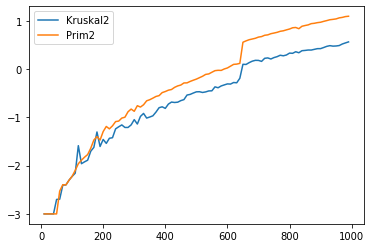

In [72]:
import matplotlib.pyplot as plt
import math

nTest=[ i*10 for i in range(1,100)]
tkruskal2=[]
tkruskal1=[]
tprim1=[]
tprim2=[]
o=[]

for i in nTest:
    print(i, end=" ")
    B=genGraphe2(i,i*30000)
    
    t1=time.time()
    arbre1=Kruskal2(B)
    t2=time.time()
    if (t2-t1)<0.001:
        tkruskal2.append(-3)
    else:
        tkruskal2.append(math.log(t2-t1,10))
    """    
    t1=time.time()
    arbre1=Kruskal(B)
    t2=time.time()
    if (t2-t1)<0.001:
        tkruskal1.append(-3)
    else:
        tkruskal1.append(math.log(t2-t1,10))
    """     
    t1=time.time()
    arbre1=Prim2(B)
    t2=time.time()
    if (t2-t1)<0.001:
        tprim2.append(-3)
    else:
        tprim2.append(math.log(t2-t1,10))
    """     
    t1=time.time()
    arbre1=Prim(B)
    t2=time.time()
    if (t2-t1)<0.001:
        tprim1.append(-3)
    else:
        tprim1.append(math.log(t2-t1,10))
    """   
    o.append(i)

#plt.plot(nTest,tkruskal1,label="Kruskal1")
plt.plot(nTest,tkruskal2,label="Kruskal2")
#plt.plot(nTest,tprim1,label="Prim1")
plt.plot(nTest,tprim2,label="Prim2")
plt.legend()

#plt.plot(nTest,o)
plt.show()

On observe alors que les 2 algorithmes donnent le même resultat. En revanche, on observe que l'algorithme de Kruskal est un peu plus long que l'algorithme de Prim en général. En effet, lorsque que nous créons notre graphe de manière aléatoire nous mettons une arête entre chaque sommet ce qui fait 100$\times$99=9900 arêtes. Par conséquent, vu que la complexité de Kruskal est de l'ordre de $nombre de Sommets \times nombred'Arêtes$ alors que celle de  Prim est de l'ordre de ${nombredeSommets}^2$, l'algorithme de Kruskal est plus long. Notre objectif est maintenant d'optimiser la complexité de ces derniers.

## Arbre couvrant de poids minimum : Modélisation PLNE

Nous allons maintenant modéliser le problème de l'arbre couvrant de poids minimum comme un programme linéaire en nombre entier. Pour cela nous utiliserons la librairie PuLP:

In [104]:
from pulp import*
import numpy as np
from itertools import combinations

**Définition du modèle :**

On considère comme précédemment un graphe non-orienté connexe $G=[S,A]$ dont chaque arête possède un poids $p_{a}$. On note désormais $n=|S|$ et $m=|A|$. Par la suite, chaque sommet sera numéroté de $0$ à $n-1$ et chaque arête sera numérotée de $0$ à $m-1$. On définit donc notre modèle :

*Variables :*
- $\forall a \in A, x_a\in \{0,1\}$ et $x_a=1$ si l'arrête $a$ est dans l'arbre couvrant de poids minimum.

*Objectif :*

- On cherche à minimiser la somme des poids des arêtes contenues dans l'arbre : 

$\min{\sum_{a\in A}{x_ap_a}}$ 

*Contraintes :*

Il faut que le graphe obtenu soit un arbre, on impose donc les 2 contraintes suivantes:

- Il faut qu'il y ait exactement $|S|-1$ arêtes soit $n-1$ arêtes:

$\begin{equation}
    {\sum_{a\in A}{x_a}=n-1}
    \end{equation}$

- Pour assurer la connexité et éviter la présence de cycles, chaque sous-ensemble $\bar{S}\subset S$ doit avoir au plus $|\bar{S}|-1$ arêtes : 

$\begin{equation}
    \sum_{a\in \bar{A}}{x_a} \le |\bar{S}|-1
    \end{equation}$, $\forall \bar{S}\subset S$ et $\bar{A}$ l'ensemble des arêtes dont les 2 sommets sont dans $\bar{S}$.


On crée donc d'abord une fonction chargée de construire le modèle. Elle prendra en argument la matrice d'incidence du graphe ainsi qu'un dictionnaire contenant les poids de chaque arête et dont la numérotation des arêtes correspond à celle de la matrice.

In [11]:
def ModelePLNE (M,P):
    
    #Création du problème :
    prob = LpProblem("ACPM",LpMinimize)
    
    n = np.shape(M)[0] #Nombre de sommets
    m = np.shape(M)[1] #Nombre d'arêtes
    S = [i for i in range(n)] #Liste des sommets
    A = [i for i in range(m)] #Listes des arêtes
    
    #Variable :
    x={}
    for i in range(m):
        #On crée une variable de décision par arête
        x[i] = LpVariable("x"+"_"+str(i),0,1,LpInteger)

            
    #Objectif :
    prob += lpSum([x[i]*P[i] for i in A])

    #Contraintes :
    
        #Contrainte 1
    prob += lpSum([x[i] for i in A]) == n-1
    
        #Contrainte 2
    for k in range(3,n):
        L = list(combination(S,k))
        for ensemble in L:
            E = []
            for j in A:
                if(np.sum([M[i][j] for i in ensemble]) == 2):
                    E.append(j)
            prob += lpSum([x[a] for a in E])<=k-1
                
    #Retour du problème :
    return(prob)

**Remarque :**

Pour modéliser la seconde contrainte, nous avons considéré toutes les combinaisons de $k\in\{3,...,n-1\}$ sommets parmi $n$ sommets au total pour décrire les sous-ensembles $\bar{S}\subset S$. Le nombre de contraintes **NbCTR** pour un graphe donné en entrée de $n$ sommets sera donc :

$NbCTR = 1+\sum_{k=3}^{n-1}{C_n^k}=\sum_{k=0}^{n}{C_n^k}+1-C_n^0-C_n^1-C_n^2-C_n^n=2^n-n-\frac{n(n-1)}{2}-1$

On crée ensuite une fonction permettant de résoudre le problème et de l'afficher. Cette fonction n'affichera que les variables de décision égales à 1 à l'issu de la résolution du problème (c'est-à-dire les arêtes qui seront présentes dans l'arbre couvrant de poids minimum) :

In [12]:
def SolveAndPrint(Modele,name):
    Modele.writeLP(name)
    print(Modele)

    # Résolution du problème :
    print("Solve with CBC")
    Modele.solve(PULP_CBC_CMD())
    print("Status :",LpStatus[Modele.status])

    #Affichage de la solution :
    print("Poids minimum =",value(Modele.objective))
    print("Solution optimale :")
    for v in Modele.variables():
        if(v.varValue != 0):
            print(v.name,"=",v.varValue)

**Exemples et tests :**

Nous allons maintenant tester ces fonctions sur des exemples (dont l'exemple du cours) :

*Exemple n°1:*

![title](image1.png)

Ce graphe possède $5$ sommets, il y aura donc $16$ contraintes. 

In [13]:
#Création de la matrice d'incidence du graphe:

M1 = np.array([[1,1,0,0,0,0,0],
               [0,1,1,0,1,1,0],
               [0,0,0,0,0,1,1],
               [0,0,0,1,1,0,1],
               [1,0,1,1,0,0,0]])
    
#Création du dictionnaire des poids:

P1 = {0:4,1:5,2:6,3:2,4:4,5:2,6:3}

#Recherche de l'arbre couvrant de poids minimum (ACPM):

SolveAndPrint(ModelePLNE(M1,P1),"ACPM Exemple n°1")

ACPM:
MINIMIZE
4*x_0 + 5*x_1 + 6*x_2 + 2*x_3 + 4*x_4 + 2*x_5 + 3*x_6 + 0
SUBJECT TO
_C1: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 = 4

_C2: x_1 + x_5 <= 2

_C3: x_1 + x_4 <= 2

_C4: x_0 + x_1 + x_2 <= 2

_C5: x_6 <= 2

_C6: x_0 <= 2

_C7: x_0 + x_3 <= 2

_C8: x_4 + x_5 + x_6 <= 2

_C9: x_2 + x_5 <= 2

_C10: x_2 + x_3 + x_4 <= 2

_C11: x_3 + x_6 <= 2

_C12: x_1 + x_4 + x_5 + x_6 <= 3

_C13: x_0 + x_1 + x_2 + x_5 <= 3

_C14: x_0 + x_1 + x_2 + x_3 + x_4 <= 3

_C15: x_0 + x_3 + x_6 <= 3

_C16: x_2 + x_3 + x_4 + x_5 + x_6 <= 3

VARIABLES
0 <= x_0 <= 1 Integer
0 <= x_1 <= 1 Integer
0 <= x_2 <= 1 Integer
0 <= x_3 <= 1 Integer
0 <= x_4 <= 1 Integer
0 <= x_5 <= 1 Integer
0 <= x_6 <= 1 Integer

Solve with CBC
Status : Optimal
Poids minimum = 11.0
Solution optimale :
x_0 = 1.0
x_3 = 1.0
x_5 = 1.0
x_6 = 1.0


Obtient ainsi l'arbre suivant. On retrouve bien le même résultat obtenu avec l'implémentation des algorithmes de Prim et de Kruskal :

![title](image2.png)

*Exemple n°2:*

On essaye maintenant notre programme sur un graphe possèdant cette fois-ci plus de sommets. Le graphe suivant possède $10$ sommets, il y aura donc $968$ contraintes dans notre programme.

![title](image3.png)

In [14]:
#Création de la matrice d'incidence:

M4 = np.zeros((10,21))
    
M4[0][0]=1; M4[0][20]=1; M4[0][16]=1
M4[1][0]=1; M4[1][1]=1; M4[1][2]=1; M4[1][4]=1
M4[2][20]=1; M4[2][1]=1; M4[2][3]=1; M4[2][3]=1; M4[2][14]=1; M4[2][15]=1
M4[3][3]=1; M4[3][2]=1; M4[3][5]=1; M4[3][6]=1
M4[4][4]=1; M4[4][5]=1; M4[4][7]=1; M4[4][9]=1; M4[4][8]=1
M4[5][8]=1; M4[5][11]=1; M4[5][10]=1
M4[6][13]=1; M4[6][9]=1; M4[6][11]=1; M4[6][12]=1
M4[7][10]=1; M4[7][12]=1; M4[7][18]=1; M4[7][19]=1
M4[8][17]=1; M4[8][14]=1; M4[8][6]=1; M4[8][7]=1; M4[8][13]=1; M4[8][18]=1
M4[9][16]=1; M4[9][15]=1; M4[9][17]=1; M4[9][19]=1
    
#Création du dictionnaire des poids:

P4={}
    
P4[0]=6; P4[1]=4; P4[2]=2; P4[3]=2; P4[4]=9
P4[5]=9; P4[6]=8; P4[7]=7; P4[8]=4; P4[9]=5
P4[10]=4; P4[11]=1; P4[12]=3; P4[13]=9; P4[14]=9
P4[15]=9; P4[16]=9; P4[17]=8; P4[18]=10; P4[19]=18
P4[20]=3

#Recherche de l'arbre couvrant de poids minimum (ACPM):

SolveAndPrint(ModelePLNE(M4,P4),"ACPM Exemple n°2")

ACPM:
MINIMIZE
6*x_0 + 4*x_1 + 4*x_10 + 1*x_11 + 3*x_12 + 9*x_13 + 9*x_14 + 9*x_15 + 9*x_16 + 8*x_17 + 10*x_18 + 18*x_19 + 2*x_2 + 3*x_20 + 2*x_3 + 9*x_4 + 9*x_5 + 8*x_6 + 7*x_7 + 4*x_8 + 5*x_9 + 0
SUBJECT TO
_C1: x_0 + x_1 + x_10 + x_11 + x_12 + x_13 + x_14 + x_15 + x_16 + x_17 + x_18
 + x_19 + x_2 + x_20 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 = 9

_C2: x_0 + x_1 + x_20 <= 2

_C3: x_0 + x_2 <= 2

_C4: x_0 + x_4 <= 2

_C5: x_0 <= 2

_C6: x_0 <= 2

_C7: x_0 <= 2

_C8: x_0 <= 2

_C9: x_0 + x_16 <= 2

_C10: x_20 + x_3 <= 2

_C11: x_20 <= 2

_C12: x_20 <= 2

_C13: x_20 <= 2

_C14: x_20 <= 2

_C15: x_14 + x_20 <= 2

_C16: x_15 + x_16 + x_20 <= 2

_C17: x_5 <= 2

_C18: __dummy <= 2

_C19: __dummy <= 2

_C20: __dummy <= 2

_C21: x_6 <= 2

_C22: x_16 <= 2

_C23: x_8 <= 2

_C24: x_9 <= 2

_C25: __dummy <= 2

_C26: x_7 <= 2

_C27: x_16 <= 2

_C28: x_11 <= 2

_C29: x_10 <= 2

_C30: __dummy <= 2

_C31: x_16 <= 2

_C32: x_12 <= 2

_C33: x_13 <= 2

_C34: x_16 <= 2

_C35: x_18 <= 2

_C36: x_16 + x

Status : Optimal
Poids minimum = 38.0
Solution optimale :
__dummy = None
x_11 = 1.0
x_12 = 1.0
x_17 = 1.0
x_2 = 1.0
x_20 = 1.0
x_3 = 1.0
x_6 = 1.0
x_7 = 1.0
x_8 = 1.0


 On obtient ainsi le résultat suivant. Le sous-graphe retenu est bien un arbre (c'est un graphe connexe et acyclique) et la somme des poids de toutes les arêtes est minimum :

![title](image4.png)

## Conclusion et prochains objectifs :

Nous disposons maintenant d'une première version fonctionnelle de l'algorithme de Prim, de l'algorithme de Kruskal ainsi que du modèle PLNE. L'un de nos prochains objectifs sera de mettre en évidence la complexité asymptotique de chacun de ces algorithmes. Il faudra aussi implémenter une autre version améliorée de chacun de ces algorithmes avec une compléxité optimale. L'algorithme de Kruskal que nous avons programmé a une compléxité en $O(m\times n)$. Elle peut être améliorée en optimisant la détection de cycle à chaque itération. Pour cela, on peut utiliser des "listes de sommets accessibles". De même, la version de l'algorithme de Prim que nous avons codée possède une complexité en $O(n^2)$. Il est possible d'atteindre une complexité en $O(m\log(n))$ en utilisant une structure de tas-min binaire. Il sera aussi intéressant de mettre en évidence ces améliorations. Enfin, nous traiterons l'extension possible du sujet concernant les arbres de Steiner.